# UAS

## **Dataset**

https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)


{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

## **1.	Data understanding**

### a.	Jelaskan setiap fitur atau variable data tersebut

| **Nama Fitur**             | **Tipe Data**   | **Demografi** | **Deskripsi**                                                                     | **Satuan**       |
| -------------------------- | --------------- | ------------- | --------------------------------------------------------------------------------- | ---------------- |
| `age`                      | Integer         | Age           | Umur pasien                                                                       | years            |
| `anaemia`                  | Binary          | -             | Menunjukkan apakah pasien mengalami anemia (penurunan sel darah merah)            | -                |
| `creatinine_phosphokinase` | Integer         | -             | Tingkat enzim CPK dalam darah (penanda kerusakan otot, termasuk jantung)          | mcg/L            |
| `diabetes`                 | Binary          | -             | Menunjukkan apakah pasien menderita diabetes                                      | -                |
| `ejection_fraction`        | Integer         | -             | Persentase darah yang keluar dari jantung setiap detak                            | %                |
| `high_blood_pressure`      | Binary          | -             | Menunjukkan apakah pasien memiliki tekanan darah tinggi                           | -                |
| `platelets`                | Continuous      | -             | Jumlah trombosit dalam darah                                                      | kiloplatelets/mL |
| `serum_creatinine`         | Continuous      | -             | Tingkat kreatinin dalam serum (indikator fungsi ginjal)                           | mg/dL            |
| `serum_sodium`             | Integer         | -             | Tingkat natrium dalam serum                                                       | mEq/L            |
| `sex`                      | Binary          | Sex           | Jenis kelamin pasien (0 = wanita, 1 = pria)                                       | -                |
| `smoking`                  | Binary          | -             | Menunjukkan apakah pasien merokok                                                 | -                |
| `time`                     | Integer         | -             | Durasi tindak lanjut pasien selama penelitian                                     | days             |
| `death_event`              | Binary (Target) | -             | Menunjukkan apakah pasien meninggal selama masa tindak lanjut (0 = tidak, 1 = ya) | -                |


### b. Eksplorasi Data: Kualitas Data

Contoh data:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6          

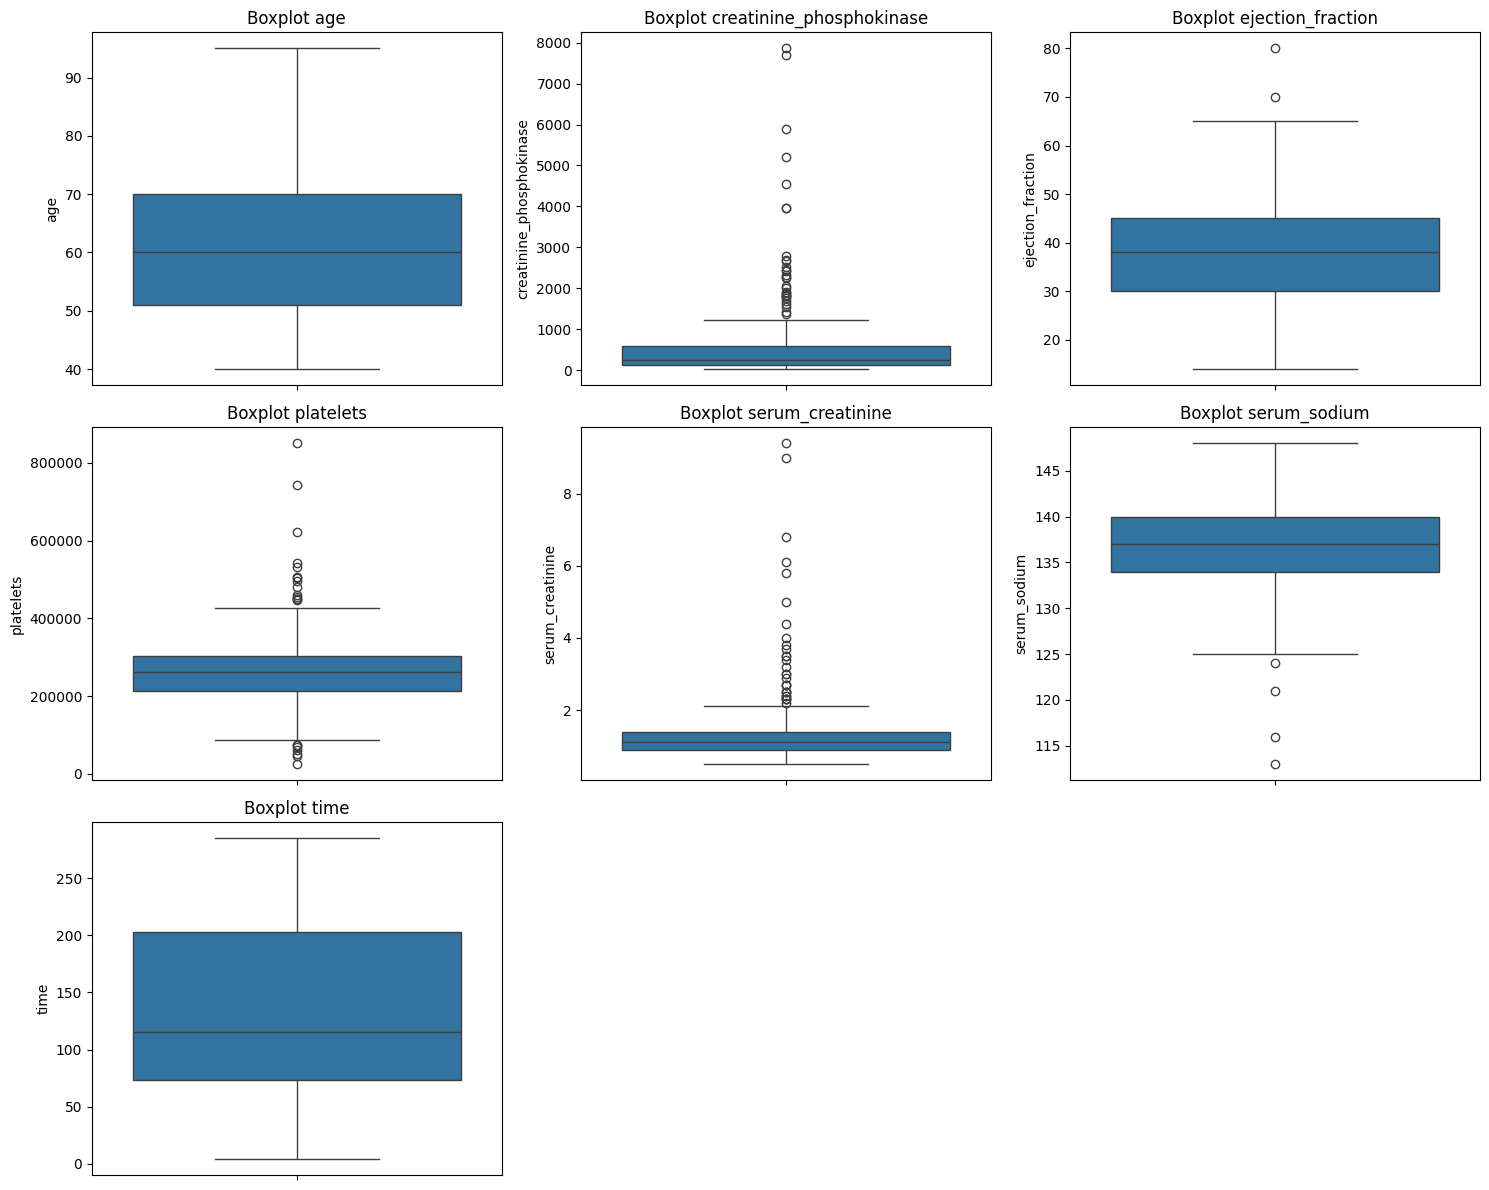


Data dengan ejection_fraction > 100%:
 Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []

Data dengan serum_sodium tidak normal:
       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4    65.0        1                       160         1                 20   
199  60.0        0                      1211         1                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
4                      0  327000.00               2.7           116    0   
199                    0  263358.03               1.8           113    1   

     smoking  time  DEATH_EVENT  
4          0     8            1  
199        1   186            0  


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)

# --- Tampilkan beberapa baris awal dan kolom ---
print("Contoh data:\n", df.head())
print("\nKolom-kolom yang tersedia:\n", df.columns.tolist())

# --- 1. Cek Missing Values ---
print("\nMissing Values per Kolom:\n", df.isnull().sum())

# --- 2. Cek Tipe Data ---
print("\nTipe Data per Kolom:\n", df.dtypes)

# --- 3. Ringkasan Statistik Deskriptif ---
print("\nStatistik Deskriptif:\n", df.describe())

# --- 4. Distribusi Nilai untuk Variabel Binary ---
# Kolom-kolom binary berdasarkan deskripsi dataset UCI
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for col in binary_cols:
    if col in df.columns:
        print(f"\nDistribusi nilai pada kolom {col}:\n", df[col].value_counts())
    else:
        print(f"\nKolom '{col}' tidak ditemukan di dataset.")

# --- 5. Deteksi Outlier dengan Boxplot ---
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                  'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# --- 6. Deteksi Nilai Tidak Wajar (contoh) ---
# Ejection fraction > 100%
invalid_ef = df[df['ejection_fraction'] > 100]
print("\nData dengan ejection_fraction > 100%:\n", invalid_ef)

# Serum sodium diluar batas normal (normal: 135 - 145 mEq/L)
abnormal_sodium = df[(df['serum_sodium'] < 120) | (df['serum_sodium'] > 150)]
print("\nData dengan serum_sodium tidak normal:\n", abnormal_sodium)


**Tujuan Utama Kode**

1. Mengimpor dan menampilkan data:

- Mengunduh dataset dari URL

- Melihat struktur awal data (head()) dan nama-nama kolom

2. Pemeriksaan kualitas data:

- Mengetahui apakah ada missing values

- Mengetahui tipe data di setiap kolom (int, float, dsb.)

- Menampilkan statistik deskriptif seperti mean, median, std dev

3. Analisis variabel kategori (biner):

- Mengetahui distribusi nilai untuk variabel binary seperti: anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT

- Berguna untuk memahami proporsi pasien dengan kondisi tertentu

4. Deteksi outlier:

- Menampilkan boxplot untuk variabel numerik

- Membantu melihat apakah ada nilai ekstrem yang tidak wajar

5. Validasi nilai medis abnormal:

- Contoh:

1) ejection_fraction seharusnya ≤ 100%, jadi nilai > 100 dicari

2) serum_sodium normalnya 135–145 mEq/L, jadi nilai di luar itu diperiksa

### c.	Visualisasikan data tersebut

Contoh data:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6          

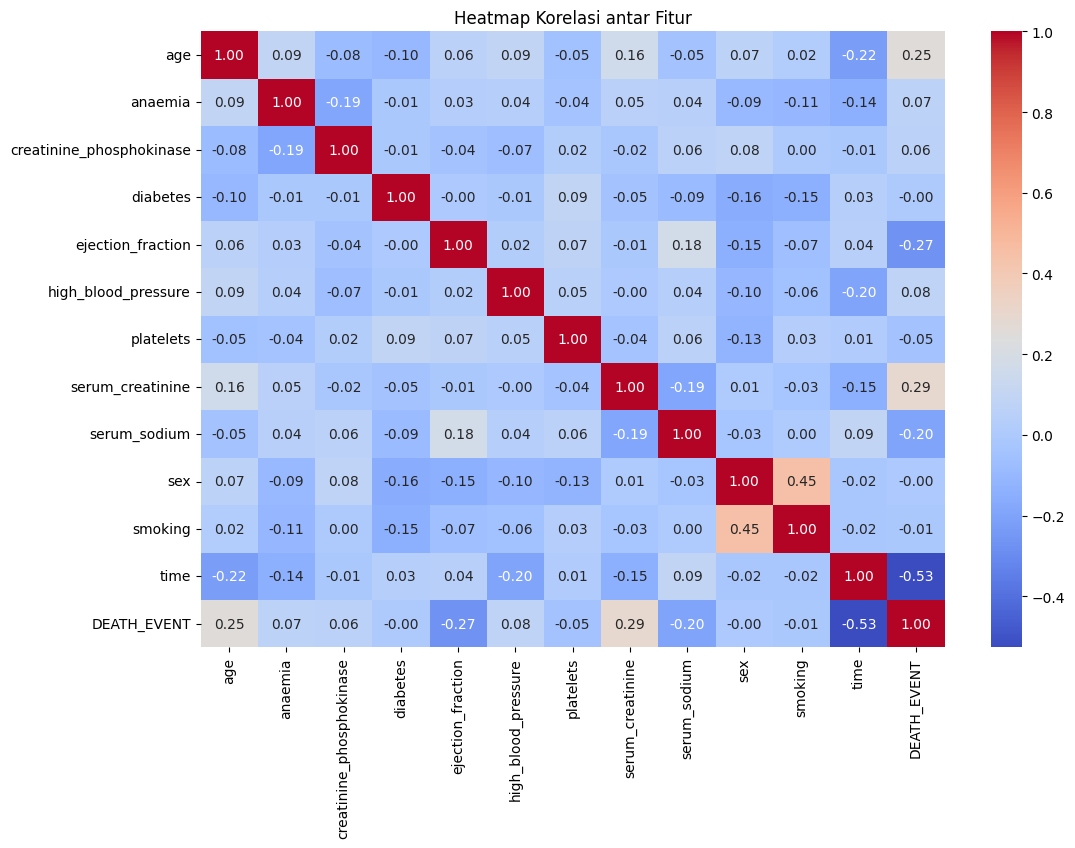

/tmp/ipython-input-12-2528292169.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DEATH_EVENT', palette='Set2')


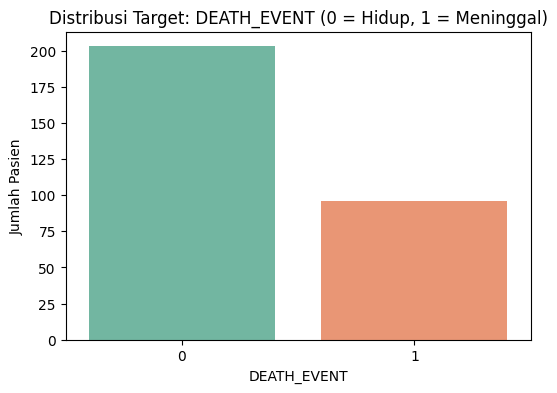

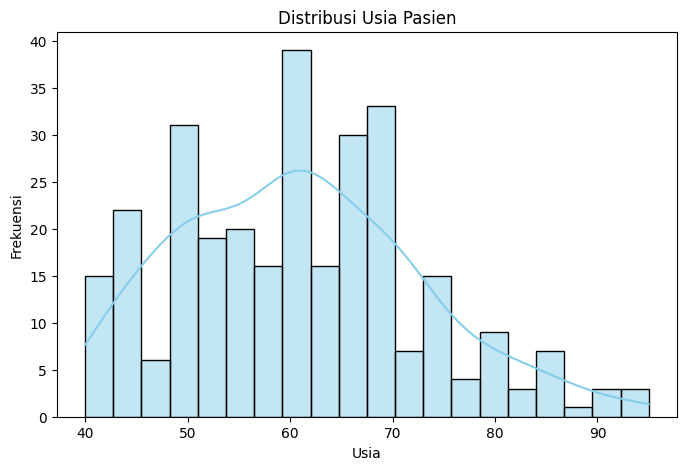

/tmp/ipython-input-12-2528292169.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEATH_EVENT', y='age', palette='Set3')


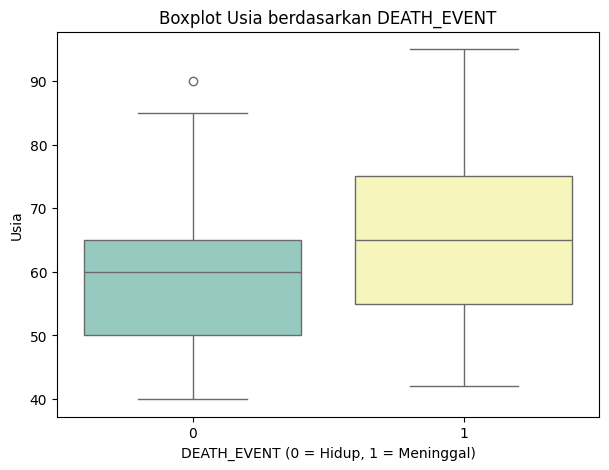

/tmp/ipython-input-12-2528292169.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
/tmp/ipython-input-12-2528292169.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
/tmp/ipython-input-12-2528292169.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
/tmp/ipython-input-12-2528292169.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

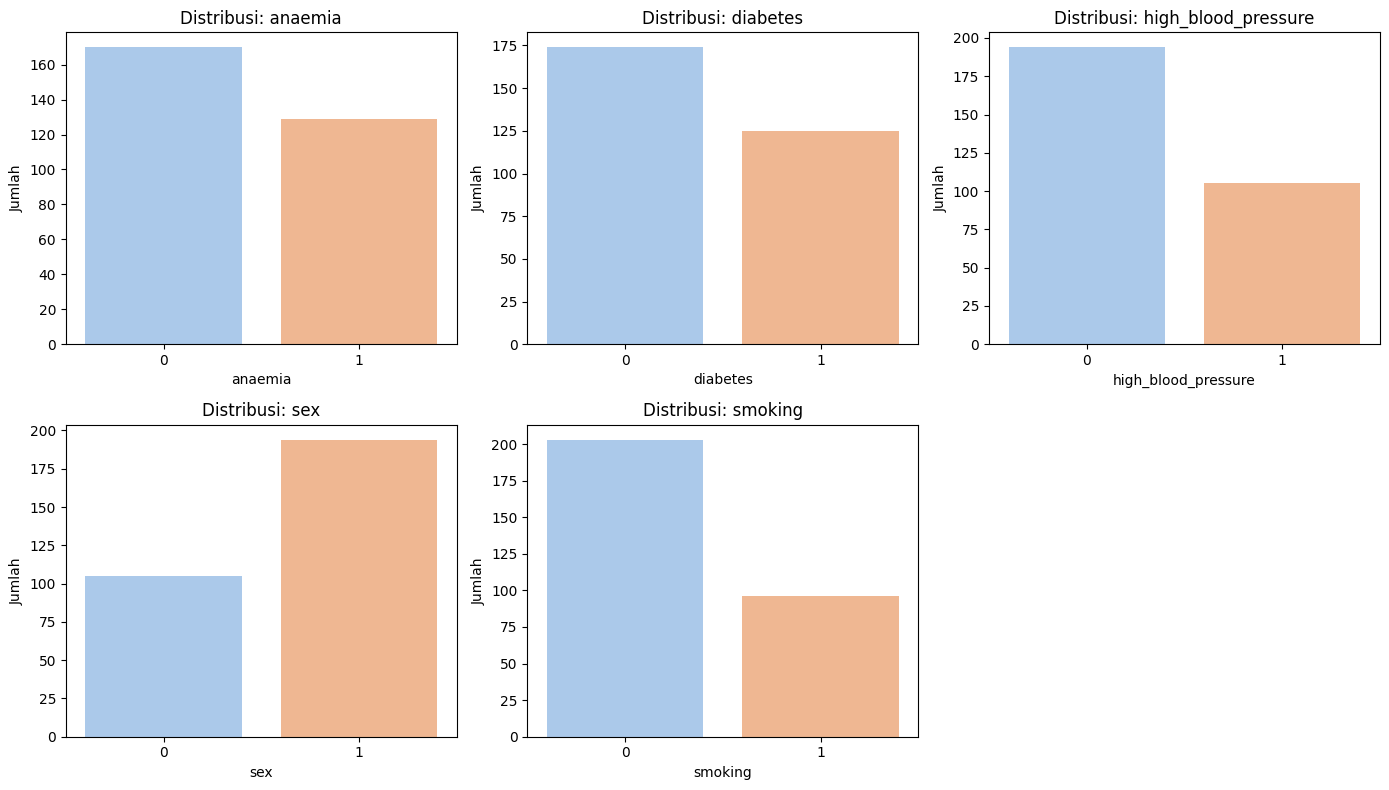

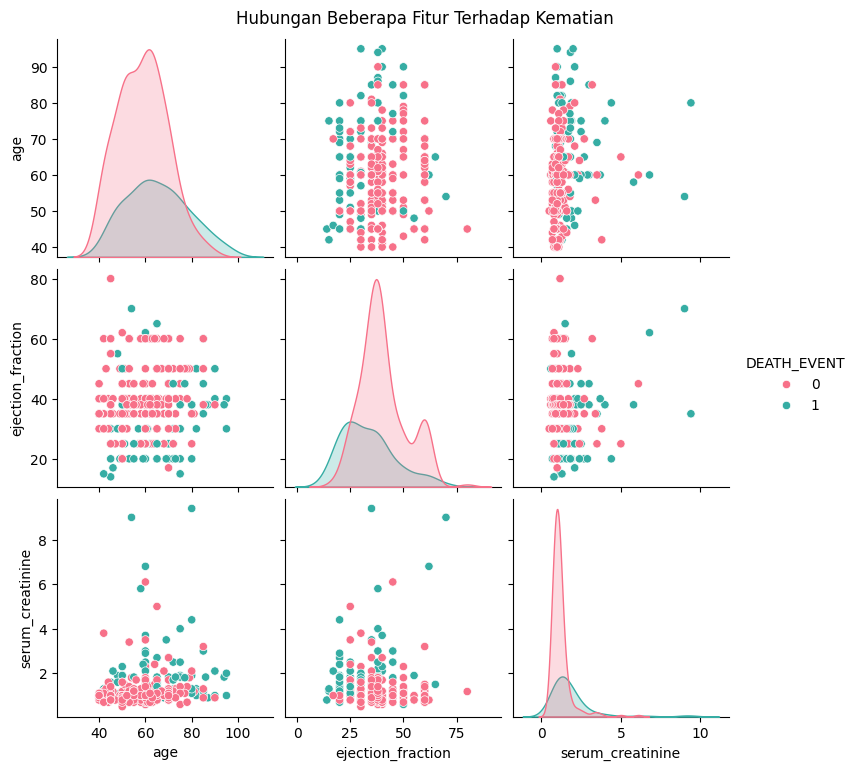

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)

# --- Tampilkan info dasar dataset ---
print("Contoh data:\n", df.head())
print("\nKolom-kolom yang tersedia:\n", df.columns.tolist())

# --- 1. Heatmap Korelasi antar Fitur Numerik ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

# --- 2. Distribusi Target DEATH_EVENT ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DEATH_EVENT', palette='Set2')
plt.title('Distribusi Target: DEATH_EVENT (0 = Hidup, 1 = Meninggal)')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Jumlah Pasien')
plt.show()

# --- 3. Distribusi Usia Pasien ---
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# --- 4. Boxplot Usia berdasarkan DEATH_EVENT ---
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='DEATH_EVENT', y='age', palette='Set3')
plt.title('Boxplot Usia berdasarkan DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = Hidup, 1 = Meninggal)')
plt.ylabel('Usia')
plt.show()

# --- 5. Distribusi Fitur Biner ---
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(14, 8))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# --- 6. Pairplot: hubungan antar fitur penting ---
subset_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'DEATH_EVENT']
sns.pairplot(df[subset_cols], hue='DEATH_EVENT', palette='husl')
plt.suptitle('Hubungan Beberapa Fitur Terhadap Kematian', y=1.02)
plt.show()


**Tujuan dari code**

1. Heatmap Korelasi antar Fitur
- Menampilkan korelasi antar fitur numerik dalam bentuk heatmap.

- Membantu mengidentifikasi fitur yang saling berkorelasi tinggi atau tidak.

2. Distribusi Target (DEATH_EVENT)
- Visualisasi jumlah pasien meninggal (1) dan hidup (0).

- Menunjukkan apakah data target imbalanced atau seimbang.

3. Distribusi Usia Pasien
- Histogram usia untuk memahami rentang dan penyebaran pasien.

- Apakah lebih banyak pasien lansia atau muda.

4. Boxplot Usia vs DEATH_EVENT
- Melihat hubungan usia dengan kematian.

- Apakah pasien yang meninggal cenderung lebih tua?

5. Distribusi Fitur Biner
- Melihat proporsi pasien berdasarkan kondisi seperti: Anemia, diabetes, tekanan darah tinggi, jenis kelamin, dan perokok.

- Untuk tahu apakah fitur-fitur ini seimbang atau tidak.

6. Pairplot antar Fitur Penting
- Visualisasi gabungan antara:age, ejection_fraction, serum_creatinine, dan DEATH_EVENT

- Untuk melihat hubungan dan pola kelompok pasien yang meninggal vs tidak.

## **2.	Prepocessing data tersebut**

In [13]:
# --- 1. Import Library ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- 2. Load Dataset ---
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)

# --- 3. Cek Struktur Data ---
print("5 data pertama:\n", df.head())
print("\nInformasi dataset:")
print(df.info())

# --- 4. Cek Missing Values ---
print("\nMissing values:\n", df.isnull().sum())

# --- 5. Cek Duplikasi ---
print("\nJumlah duplikasi:", df.duplicated().sum())
df = df.drop_duplicates()

# --- 6. Pisahkan Fitur dan Target ---
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# --- 7. Normalisasi / Standardisasi Fitur Numerik ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 8. Split Data ke Training dan Testing Set ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- 9. Cek Hasil Preprocessing ---
print("\nUkuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Distribusi y_train:\n", y_train.value_counts(normalize=True))
print("Distribusi y_test:\n", y_test.value_counts(normalize=True))


5 data pertama:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6       

Preprocessing dataset *Heart Failure Clinical Records* dilakukan untuk menyiapkan data sebelum pemodelan. Langkah awal dimulai dengan mengimpor pustaka penting, membaca data dari UCI, dan mengecek struktur serta kebersihan data, termasuk missing values dan duplikasi. Data kemudian dipisah menjadi fitur (X) dan target (`DEATH_EVENT`), lalu fitur dinormalisasi menggunakan `StandardScaler` agar berada pada skala yang sama. Setelah itu, data dibagi menjadi data latih (80%) dan data uji (20%) dengan `train_test_split` dan `stratify` untuk menjaga proporsi kelas. Langkah terakhir adalah memverifikasi ukuran dan distribusi data agar siap digunakan dalam pemodelan machine learning.


## **3. Modelling**

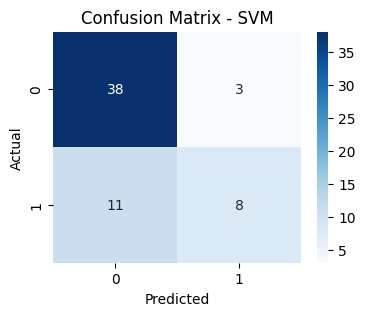


=== SVM ===
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



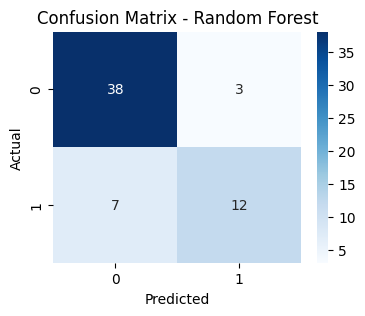


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



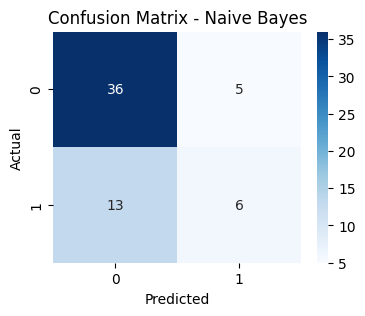


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.55      0.32      0.40        19

    accuracy                           0.70        60
   macro avg       0.64      0.60      0.60        60
weighted avg       0.67      0.70      0.67        60


=== Perbandingan Model ===
           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.766667   0.727273  0.421053  0.533333
1  Random Forest  0.833333   0.800000  0.631579  0.705882
2    Naive Bayes  0.700000   0.545455  0.315789  0.400000


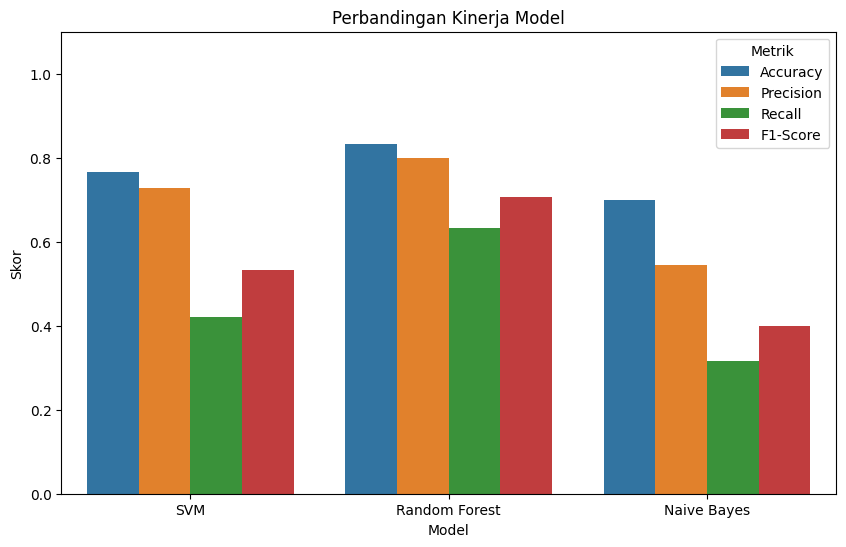

In [14]:
# --- 1. Import Library Tambahan ---
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Inisialisasi Model ---
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# --- 3. Training, Prediksi & Evaluasi ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Simpan hasil evaluasi
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Tampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Tampilkan Classification Report
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

# --- 4. Tampilkan Perbandingan Tabel ---
results_df = pd.DataFrame(results)
print("\n=== Perbandingan Model ===")
print(results_df)

# --- 5. Visualisasi Perbandingan Model ---
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Perbandingan Kinerja Model')
plt.ylabel('Skor')
plt.ylim(0, 1.1)
plt.legend(title='Metrik')
plt.show()


Kode tersebut bertujuan untuk membandingkan tiga model klasifikasi—SVM, Random Forest, dan Naive Bayes—dalam memprediksi kematian pasien berdasarkan data klinis. Setiap model dilatih dengan data training, lalu diuji pada data testing. Evaluasi dilakukan menggunakan metrik akurasi, presisi, recall, dan F1-score. Hasil evaluasi ditampilkan dalam bentuk tabel dan visualisasi grafik batang, serta dilengkapi confusion matrix dan classification report untuk masing-masing model. Tujuannya adalah mengetahui model mana yang paling efektif dalam klasifikasi kasus gagal jantung.


## **4. Evaluasi**

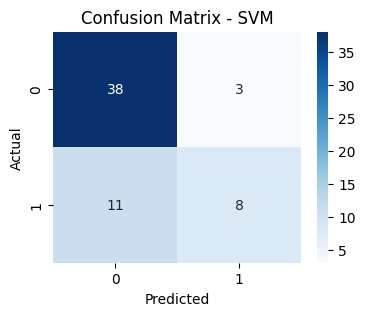


=== Classification Report: SVM ===
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



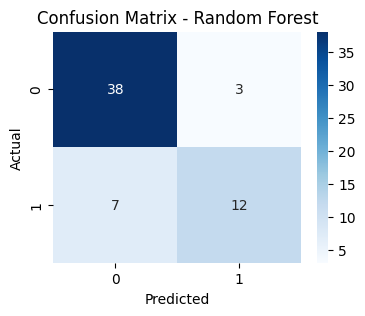


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



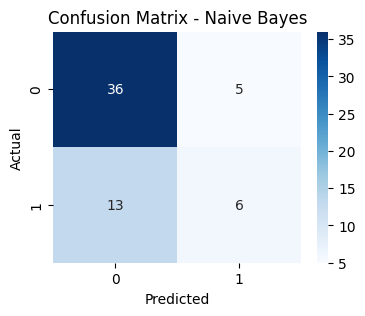


=== Classification Report: Naive Bayes ===
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.55      0.32      0.40        19

    accuracy                           0.70        60
   macro avg       0.64      0.60      0.60        60
weighted avg       0.67      0.70      0.67        60


=== Tabel Perbandingan Model ===
           Model  Accuracy  Precision    Recall  F1-Score
1  Random Forest  0.833333   0.800000  0.631579  0.705882
0            SVM  0.766667   0.727273  0.421053  0.533333
2    Naive Bayes  0.700000   0.545455  0.315789  0.400000


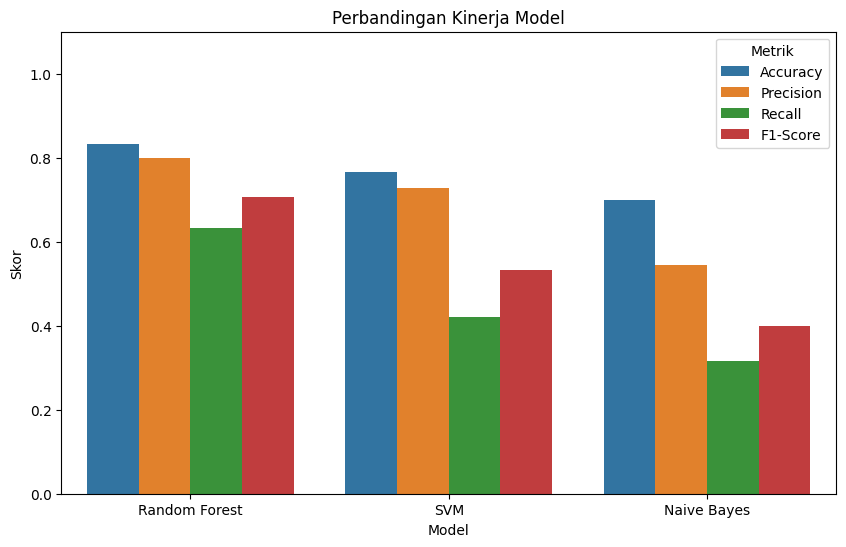


=== Kesimpulan ===
Model terbaik berdasarkan F1-Score adalah **Random Forest** dengan akurasi: 0.83, precision: 0.80, recall: 0.63, dan F1-score: 0.71.

Model ini paling seimbang dalam hal mendeteksi pasien yang berisiko meninggal (positif class), dengan minim false positive maupun false negative.


In [15]:
# --- Import Library Evaluasi ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Inisialisasi Model ---
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []

# --- Training, Prediksi, Evaluasi ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Confusion Matrix
    plt.figure(figsize=(4, 3))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, y_pred))

# --- Tabel Perbandingan ---
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print("\n=== Tabel Perbandingan Model ===")
print(results_df)

# --- Visualisasi ---
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Perbandingan Kinerja Model')
plt.ylabel('Skor')
plt.ylim(0, 1.1)
plt.legend(title='Metrik')
plt.show()

# --- Kesimpulan Otomatis ---
best_model = results_df.iloc[0]
print("\n=== Kesimpulan ===")
print(f"Model terbaik berdasarkan F1-Score adalah **{best_model['Model']}** "
      f"dengan akurasi: {best_model['Accuracy']:.2f}, "
      f"precision: {best_model['Precision']:.2f}, "
      f"recall: {best_model['Recall']:.2f}, "
      f"dan F1-score: {best_model['F1-Score']:.2f}.\n")

print("Model ini paling seimbang dalam hal mendeteksi pasien yang berisiko meninggal (positif class), "
      "dengan minim false positive maupun false negative.")


Tujuan dari kode ini adalah untuk mengevaluasi dan membandingkan performa tiga model klasifikasi—SVM, Random Forest, dan Naive Bayes—dalam memprediksi kematian pasien. Evaluasi dilakukan dengan metrik akurasi, presisi, recall, dan F1-score. Hasilnya ditampilkan dalam bentuk tabel, visualisasi grafik, dan confusion matrix untuk mengetahui model yang paling akurat dan seimbang dalam mendeteksi pasien berisiko.
